Импорт библиотеки

In [2]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller

Из первого задания

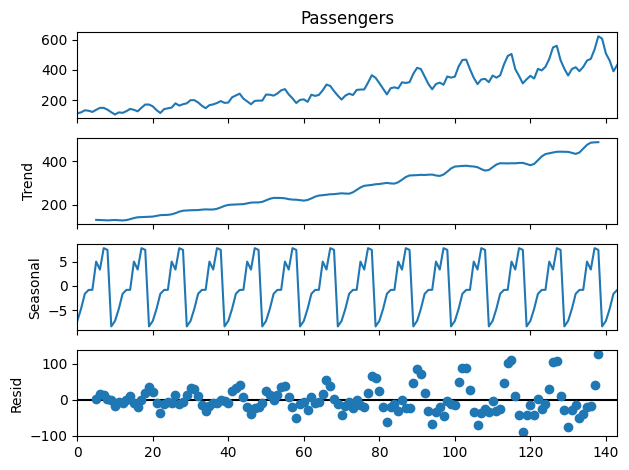

In [2]:
dirname = os.path.abspath(os.curdir) + r'\data\underwork\5'
tsdf_c = pd.read_csv(path.join(os.sep, dirname, 'calm_p.csv'))
tsdf_c.set_index('Time').sort_index()

passengers = pd.read_csv('data/passengers.csv')
passengers['Month'] = pd.to_datetime(passengers['Month'])
df = passengers.set_index('Month').sort_index()

exchange_rates = pd.read_csv('data/Daily foreign exchange rates AustraliaUS BritishUS CanadianUS DutchUS .csv')

decompose = seasonal_decompose(passengers["Passengers"], period=10)
decompose.plot()
plt.show()

Задание №2. Проверка ряда

In [3]:
alpha = 0.05
name = "Пассажиры"
ts = passengers["Passengers"]

print('Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда {name} :
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


Тренд

C:\Users\artem\AppData\Local\Temp\ipykernel_12676\2607559707.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window), color="red")


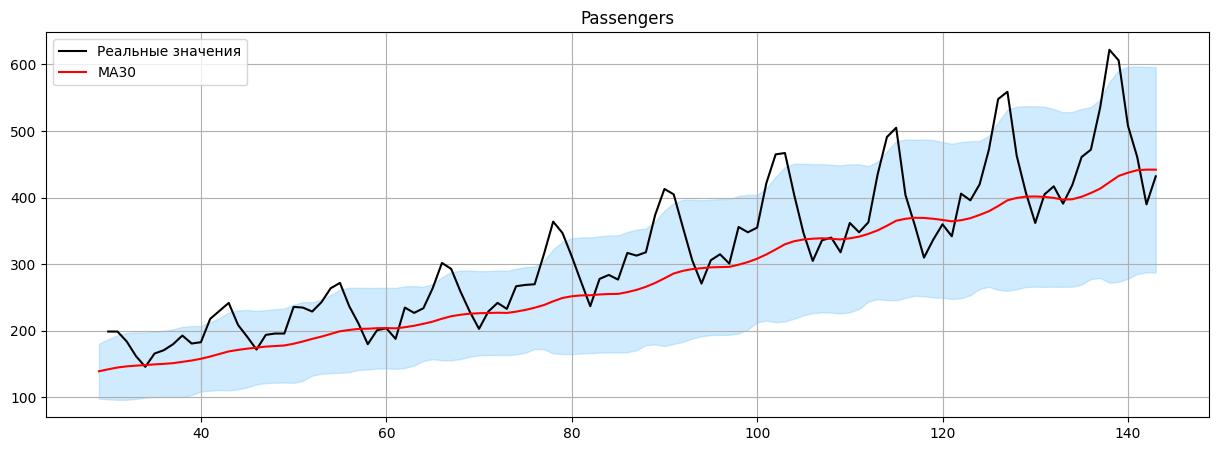

In [4]:
window = 30
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")
plt.plot(rolling_mean, 'g', label='MA'+str(window), color="red")

lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)
plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound, color='lightskyblue', alpha=0.4)
plt.legend(loc='best')

plt.grid(True)
plt.show()

Автокорреляция и частичная автокорреляция

<Figure size 1200x700 with 0 Axes>

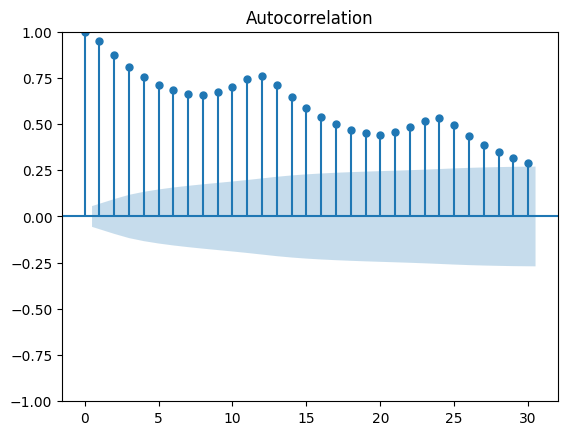

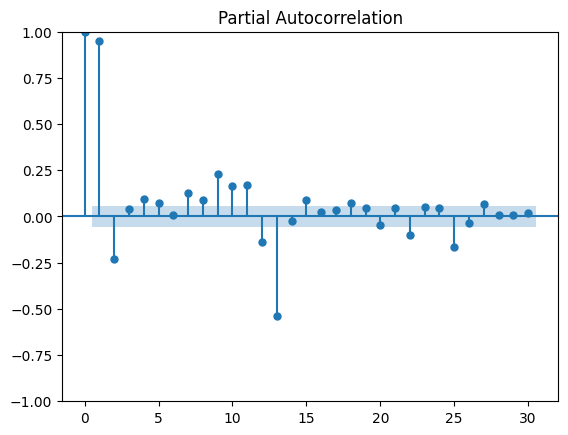

In [5]:
import statsmodels.tsa.api as smt

ts = passengers["Passengers"]
fig = plt.figure(figsize=(12, 7))
# автокорреляционная функция
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)
pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

Text(0.5, 1.0, 'Time Series Analysis Plots. Аддитивный ряд')

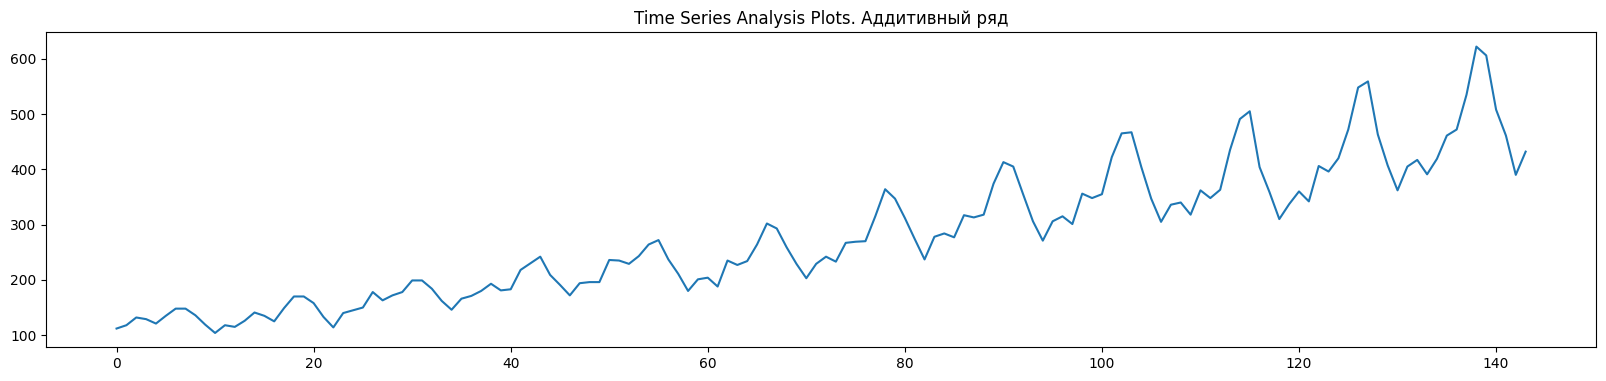

In [6]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 1)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots. Аддитивный ряд')

Раздобудем мультипликативный ряд из другого датасета (своего)

In [10]:
rates = pd.read_csv('../Л3/data/Radioactivity_in_the_ground_at_10_minute_intervals_over_one_month.csv')
rates = rates[0:300]

<Figure size 1200x700 with 0 Axes>

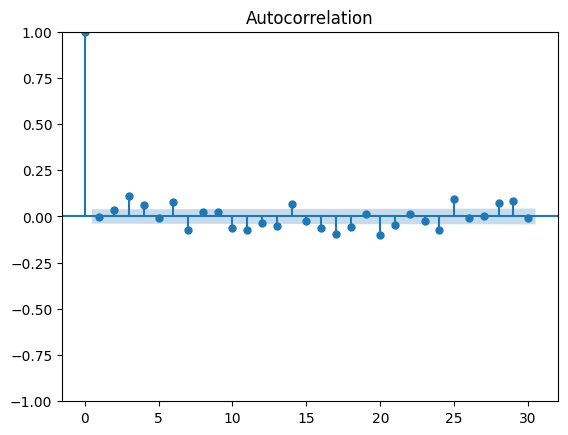

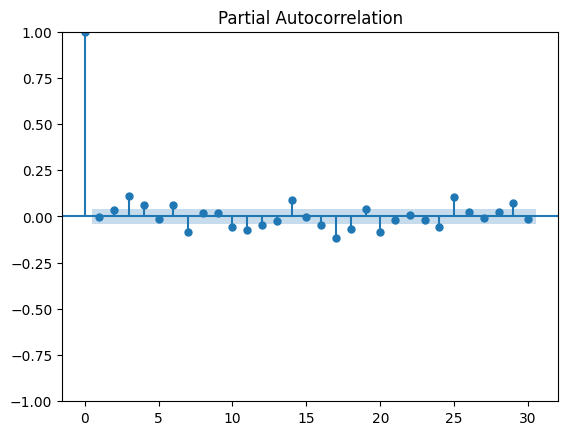

In [11]:
import statsmodels.tsa.api as smt
ts = rates["rate"]
fig = plt.figure(figsize=(12, 7))
# автокорреляционная функция
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)
pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

Text(0.5, 1.0, 'Time Series Analysis Plots. Мультипликативный ряд')

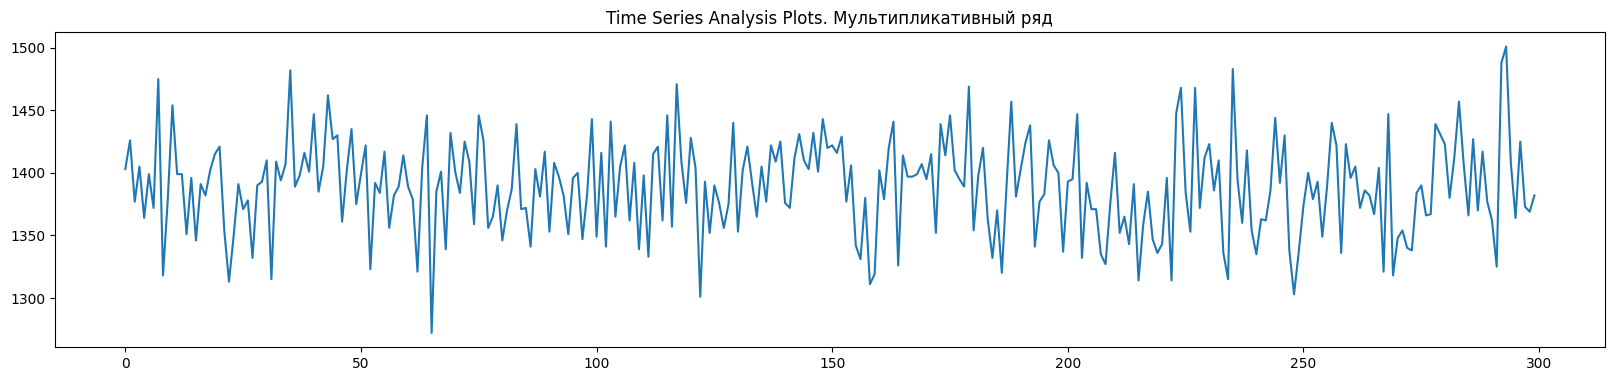

In [12]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 1)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots. Мультипликативный ряд')